In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
from scipy.constants import hbar
#from rydbperc.cython_utilities import util
from rydbperc import ryperc
from rydbperc import twoatoms
import numpy as np

In [71]:
text = "simulation parameters:\n"

N_points = 3000

Delta = 40 # detuning [MHz]

text += "detuning from Rydberg = %.1f \n"%Delta

C6 = 0.870 *10**6
gamma_def = 4.4 # [MHz]
radius_shell = (C6/(Delta))**(1/6)
delta_radius_shell = radius_shell*(gamma_def/(6*Delta))

text += "facilitation shell radius and delta = %.1f +- %.1f \n" %(radius_shell,delta_radius_shell/2)

dt = 1 # [us]
evo_time = 1500 # [us]
N_steps = int(evo_time/dt)

text += "number of steps = %d \n"%N_steps

power_blue = 1.5e-3
waste_blue = 40e-6
power_IR = 40e-3
waste_IR = 100e-6
detuning_blue = 1000
detuning_IR = Delta

atom = twoatoms.single_atom(power_blue, waste_blue, power_IR, waste_IR, detuning_blue, detuning_IR=detuning_IR)#, power_depumping=10e-3, waste_depumping=100e-6)
rho0 = np.zeros([4,4])
rho0[0,0] = 1
steps = 10000
time = dt
atom.evolve(time, steps, rho0)


p_spont_exc = atom.get_excitation_probability()
p_spont_emi = atom.Gamma_70s * dt
p_facilitation = 1

text += "probabiliy spontaneous excitation = %.4f \n"%(p_spont_exc*N_steps)
text += "probabiliy spontaneous emission = %.4f \n"%p_spont_emi
text += "probabiliy facilitated excitation = %.4f \n"%p_facilitation

shape = [40,40,50] # shape MOT in microns
density = N_points/(shape[0]*shape[1]*shape[2]*10**-2) # atoms/cm^3

text += "mean density = %.1f\n"%density
print(text)

simulation parameters:
detuning from Rydberg = 40.0 
facilitation shell radius and delta = 5.3 +- 0.0 
number of steps = 1500 
probabiliy spontaneous excitation = 0.0058 
probabiliy spontaneous emission = 0.0027 
probabiliy facilitated excitation = 1.0000 
mean density = 3.8



In [79]:
def experiment():
    excs = []
    repetitions = 10
    for _ in range(repetitions):
        clu = ryperc.cluster3D(N_points, shape, distribution="uniform")

        clu.set_evolution_parameters(
                                    shell_radius=radius_shell, 
                                    shell_delta=delta_radius_shell, 
                                    p_spont_exct=p_spont_exc, 
                                    p_emission=p_spont_emi, 
                                    p_fac=p_facilitation
                                    )

        excs.append(clu.evolve(N_steps))
    return np.mean(excs, axis=0)[-1]

In [82]:
res = []
for N_points in np.arange(500, 6000, step=500):
    print(N_points)
    res.append(experiment())

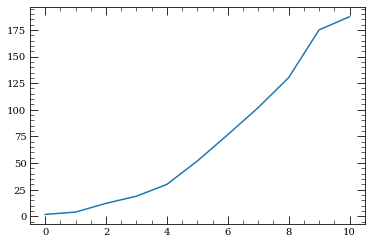

In [83]:
plt.plot(res)
plt.show()

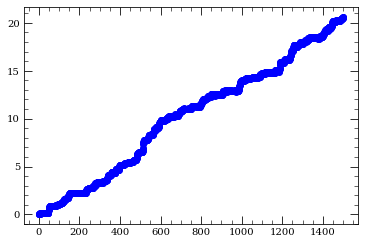

In [73]:
#times = np.linspace(0, evo_time, N_steps)
#for rep in range(repetitions):
plt.plot(times, 0.4*np.mean(excs, axis=0), linestyle="", marker="o", color="blue")
plt.show()